In [ ]:
from diffusion_curvature.laziness import curvature
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
def minmaxscale(x):
  x = np.array(x)
  x = x - min(x)
  x /= max(x).astype(float)
  return x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 03b Avg Transition Probability Curvature

In [ ]:
x = [1,5,2,3,6,1,39,16,15.0]
minmaxscale(x)

array([0.        , 0.10526316, 0.02631579, 0.05263158, 0.13157895,
       0.        , 1.        , 0.39473684, 0.36842105])

# Torus

In [ ]:
# Establish Datasets
from diffusion_curvature.datasets import torus, ellipsoid, hyperboloid
from diffusion_curvature.core import plot_3d
from diffusion_curvature.core import DiffusionMatrix

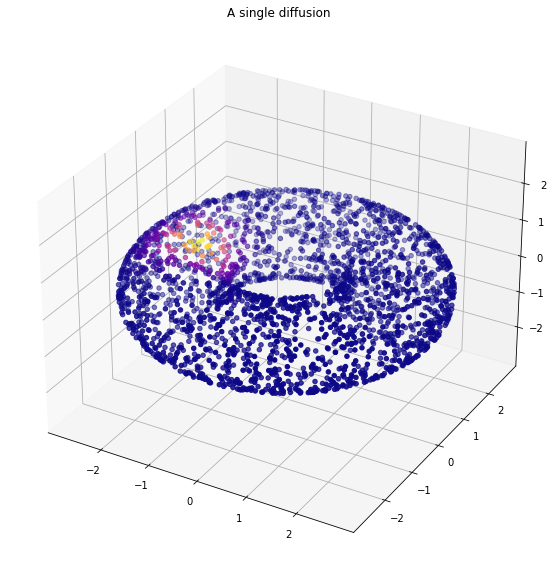

In [ ]:
X,ks = torus(n=5000)
P_anis = DiffusionMatrix(X,kernel_type="anisotropic",sigma=0.5)
plot_3d(X,P_anis[0],"A single diffusion")

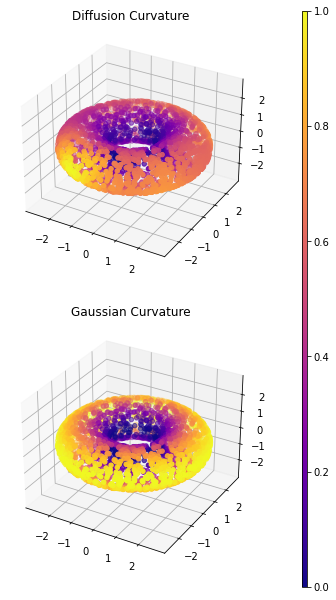

In [ ]:

ds = curvature(P_anis,diffusion_powers=8,aperture=20,dynamically_adjusting_neighborhood=False,smoothing=1, avg_transition_probability=True)
lim = np.max(np.linalg.norm(X,axis=1))
fig = plt.figure(figsize=(10,10))
# scale both dc curvature and gaussian curvature to be in same range
ds = minmaxscale(ds)
ks = minmaxscale(ks)
# Diffusion Curvature
ax = fig.add_subplot(211,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im1 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ds,cmap="plasma")
ax.set_title("Diffusion Curvature")
# Ground Truth Comparison
ax = fig.add_subplot(212,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im2 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
ax.set_title("Gaussian Curvature")
# Set colorbar along side
cax = plt.axes([0.75, 0.1, 0.007, 0.8])
plt.colorbar(im1,cax = cax)
plt.show()

Interestingly, the adaptive anisotropic kernel does a much better job here.

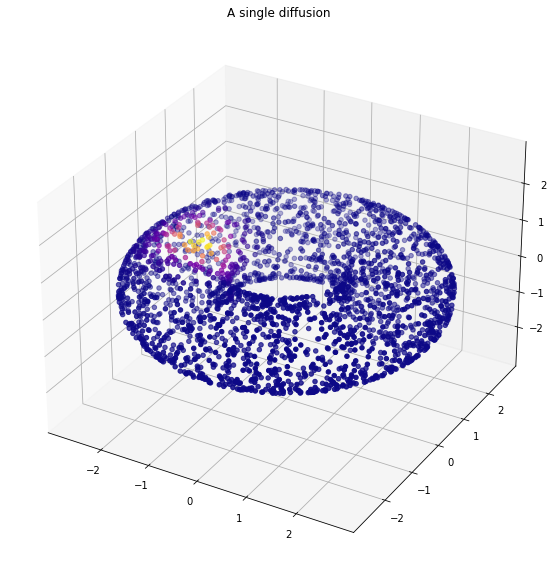

In [ ]:
P_anis = DiffusionMatrix(X,kernel_type="adaptive anisotropic",k=20)
plot_3d(X,P_anis[0],"A single diffusion")

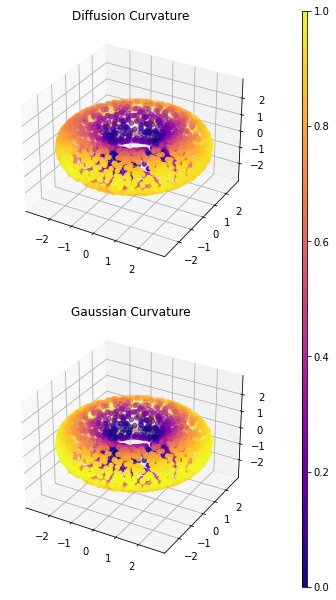

In [ ]:
ds = curvature(P_anis,diffusion_powers=32,aperture=20,dynamically_adjusting_neighborhood=False,smoothing=1, avg_transition_probability=True)
lim = np.max(np.linalg.norm(X,axis=1))
fig = plt.figure(figsize=(10,10))
# scale both dc curvature and gaussian curvature to be in same range
ds = minmaxscale(ds)
ks = minmaxscale(ks)
# Diffusion Curvature
ax = fig.add_subplot(211,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im1 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ds,cmap="plasma")
ax.set_title("Diffusion Curvature")
# Ground Truth Comparison
ax = fig.add_subplot(212,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im2 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
ax.set_title("Gaussian Curvature")
# Set colorbar along side
cax = plt.axes([0.75, 0.1, 0.007, 0.8])
plt.colorbar(im1,cax = cax)
plt.show()

# Ellipsoid

**Note!** The Ellipsoid's sampling currently appears to be broken, in that it samples from the top and bottom of the ellipsoid in excess to the sides, creating little spots of extremely compressed points. 

In [ ]:
X_ellipsoid, ks_ellipsoid = ellipsoid(n=5000)
P_anis_ellipsoid = DiffusionMatrix(X_ellipsoid,kernel_type="anisotropic",sigma=0.7,k=10)
plot_3d(X_ellipsoid,P_anis_ellipsoid[0],"A single diffusion",use_plotly=True)

[0.00145149 0.00241475 0.00297694 ... 0.00323859 0.00321008 0.00237023]
Derived threshold  0.0030025499901127134
[ 0  0  5 ... 29 23  0]
Performing matrix powers...
local density [ 0  0  5 ... 29 23  0]
Applying smoothing...


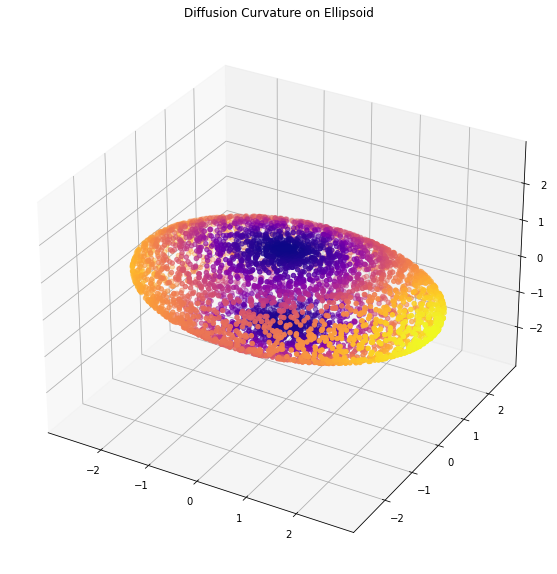

In [ ]:
ds = curvature(P_anis_ellipsoid,diffusion_powers=8,aperture=10,dynamically_adjusting_neighborhood=False,smoothing=1, avg_transition_probability=True, verbose = True)
plot_3d(X_ellipsoid,ds,title="Diffusion Curvature on Ellipsoid")

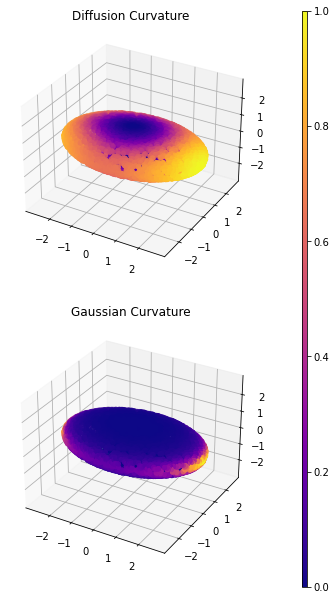

In [ ]:
lim = np.max(np.linalg.norm(X_ellipsoid,axis=1))
fig = plt.figure(figsize=(10,10))
# scale both dc curvature and gaussian curvature to be in same range
ds = minmaxscale(ds)
ks = minmaxscale(ks_ellipsoid)
# Diffusion Curvature
ax = fig.add_subplot(211,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im1 = ax.scatter(X_ellipsoid[:,0],X_ellipsoid[:,1],X_ellipsoid[:,2],c=ds,cmap="plasma")
ax.set_title("Diffusion Curvature")
# Ground Truth Comparison
ax = fig.add_subplot(212,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im2 = ax.scatter(X_ellipsoid[:,0],X_ellipsoid[:,1],X_ellipsoid[:,2],c=ks,cmap="plasma")
ax.set_title("Gaussian Curvature")
# Set colorbar along side
cax = plt.axes([0.75, 0.1, 0.007, 0.8])
plt.colorbar(im1,cax = cax)
plt.show()

# Hyperboloid

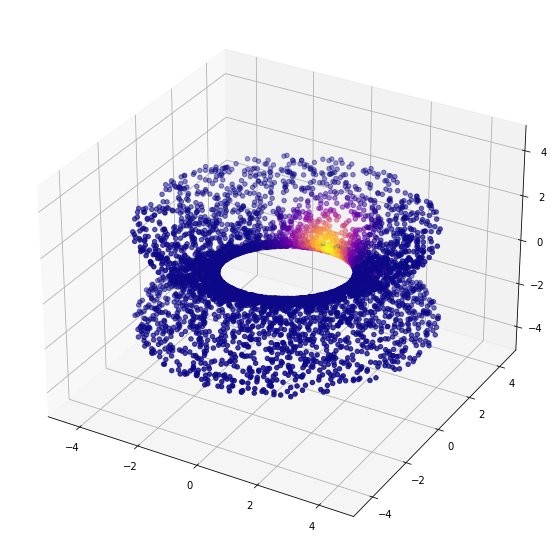

In [ ]:
X, ks = hyperboloid(n=5000)
P = DiffusionMatrix(X,kernel_type="anisotropic",k=10,sigma=0.7)
plot_3d(X,P[108])

[0.00338525 0.0033843  0.00915452 ... 0.00388291 0.01035515 0.0040274 ]
Derived threshold  0.003250275018800443
[ 35  33 112 ...  60 111  69]
Performing matrix powers...
local density [ 35  33 112 ...  60 111  69]
Applying smoothing...


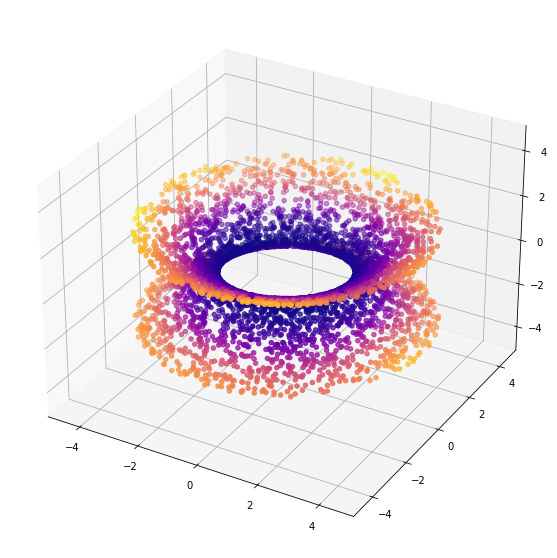

In [ ]:
ds = curvature(P,diffusion_powers=2,aperture=20,dynamically_adjusting_neighborhood=False,smoothing=1, avg_transition_probability=True, verbose = True, use_min_threshold=True)
plot_3d(X,ds)

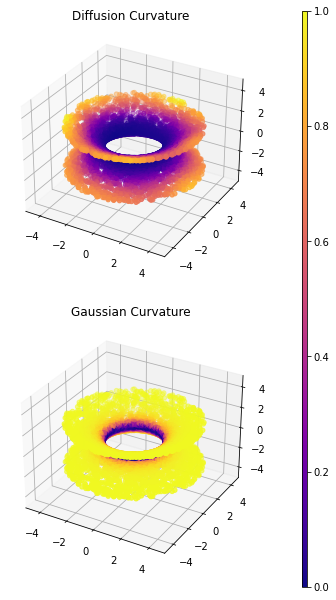

In [ ]:
lim = np.max(np.linalg.norm(X,axis=1))
fig = plt.figure(figsize=(10,10))
# scale both dc curvature and gaussian curvature to be in same range
ds = minmaxscale(ds)
ks = minmaxscale(ks)
# Diffusion Curvature
ax = fig.add_subplot(211,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im1 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ds,cmap="plasma")
ax.set_title("Diffusion Curvature")
# Ground Truth Comparison
ax = fig.add_subplot(212,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im2 = ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
ax.set_title("Gaussian Curvature")
# Set colorbar along side
cax = plt.axes([0.75, 0.1, 0.007, 0.8])
plt.colorbar(im1,cax = cax)
plt.show()